In [69]:
import uproot
import numpy as np
import scipy
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm
import pandas as pd
import math
from scipy import stats
import mpl_scatter_density
import os
import random
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
from scipy.spatial import cKDTree

In [70]:
IFT= uproot.open('../David_IFT_ntuple/trackerspfit_79_00.root')

In [71]:
# As awkward arrays
tree = IFT['spfit']
ift_tree= tree.arrays([
                   'evtId',
                   'evtTime',
                   'sp_track_x',
                   'sp_track_y',
                   'sp_track_z',
                   'sp_track_x_err',
                   'sp_track_y_err',
                   'sp_track_z_err',
                   'sp_track_x_predicted',
                   'sp_track_y_predicted',
                   'sp_track_z_predicted',
                   'sp_track_x_residual',
                   'sp_track_y_residual',
                   'sp_track_z_residual',
                   'track_p1',
                   'track_p3'], library='ak')

In [75]:
def DefineIFT(data, status=''):
    if status =='first': # first layer
        position = ak.where(ak.num(data)==3)
        result = ak.firsts(data[position])  
    elif status == 'second': # second layer
        result = ak.mask(data, ak.num(data)==3)[:, 1]
        result = result[~ak.is_none(result)]
    elif status == 'third': # third layer
        result = ak.mask(data, ak.num(data)==3)[:, -1]
        result = result[~ak.is_none(result)]
    else:
        print('missing element')
    return result

pos = ak.where(ak.num(ift_tree['sp_track_x'])==3)
evtn = ift_tree['evtId'][pos]
timestamp_arr=ift_tree['evtTime'][pos]
def ConvertPanda(ift):
    dict = {'evtID': evtn,
            'evtTime': timestamp_arr,
            "x1": DefineIFT(ift['sp_track_x'], status='first'),
            "y1":DefineIFT(ift['sp_track_y'], status='first'),
            "z1":DefineIFT(ift['sp_track_z'], status='first'),
            "x2": DefineIFT(ift['sp_track_x'], status='second'),
            "y2":DefineIFT(ift['sp_track_y'], status='second'),
            "z2":DefineIFT(ift['sp_track_z'], status='second'),
            "x3": DefineIFT(ift['sp_track_x'], status='third'),
            "y3":DefineIFT(ift['sp_track_y'], status='third'),
            "z3":DefineIFT(ift['sp_track_z'], status='third'),
            "tx":DefineIFT(ift['track_p1'], status='first'), "ty":DefineIFT(ift['track_p3'], status='third')}
    return pd.DataFrame(dict)


ift = ConvertPanda(ift_tree)
# Ruling out those are in different modules
#ift = ift[ift['z1'] < N]
ift

,evtID,evtTime,x1,y1,z1,x2,y2,z2,x3,y3,z3,tx,ty
0,11,1634581428,-88.001732,-51.193863,238.850006,-76.000931,-43.351295,270.350006,-64.000130,-35.511730,301.850006,3.809778e-01,0.248923
1,17,1634581432,-35.998268,-14.346496,238.850006,-37.998402,-14.665559,270.350006,-39.998535,-15.027632,301.850006,-6.349626e-02,-0.010812
2,19,1634581432,-17.997066,39.191463,246.794998,-15.996933,37.592144,278.295013,-16.997000,35.809788,309.795013,1.587402e-02,-0.053677
3,22,1634581433,76.000931,41.471920,243.705002,76.000931,41.192863,275.204987,74.000801,40.910809,306.704987,-3.174812e-02,-0.008907
4,24,1634581433,-53.999466,-98.930664,246.794998,-49.999199,-99.769829,278.295013,-46.999001,-100.792038,309.795013,1.111187e-01,-0.029546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64875,223199,1634595308,-92.001999,53.554337,246.794998,-94.002136,53.395306,278.295013,-92.001999,53.193264,309.795013,5.719553e-09,-0.005731
64876,223200,1634595308,19.997200,-105.772034,243.705002,19.997200,-106.051086,275.204987,19.997200,-106.213120,306.704987,-9.358943e-10,-0.007001
64877,223204,1634595308,41.998665,-117.814438,243.705002,41.998665,-118.013481,275.204987,39.998535,-118.135506,306.704987,-3.174834e-02,-0.005096
64878,223208,1634595308,55.999599,95.129906,251.649994,55.999599,94.690819,283.149994,53.999466,94.248726,314.649994,-3.174807e-02,-0.013987


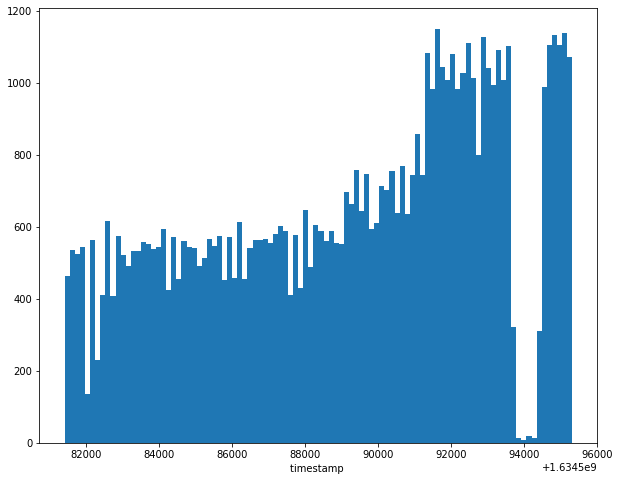

In [97]:
plt.figure(figsize=(10,8))
evthist=plt.hist(ift['evtTime'],bins=100)
#plt.xticks(np.linspace(163.458, 163.45957, 10))
plt.xlabel('timestamp ')
plt.show()

In [116]:
evthist[0],evthist[1]

(array([ 463.,  534.,  525.,  545.,  135.,  563.,  229.,  411.,  617.,
         408.,  574.,  522.,  491.,  533.,  533.,  558.,  552.,  538.,
         544.,  594.,  424.,  571.,  456.,  561.,  545.,  540.,  490.,
         513.,  566.,  547.,  575.,  453.,  572.,  457.,  614.,  454.,
         542.,  562.,  562.,  567.,  555.,  579.,  601.,  587.,  409.,
         578.,  430.,  646.,  488.,  606.,  588.,  561.,  587.,  554.,
         551.,  695.,  664.,  757.,  643.,  745.,  594.,  609.,  712.,
         701.,  755.,  637.,  768.,  636.,  744.,  858.,  744., 1082.,
         983., 1150., 1043., 1007., 1080.,  983., 1027., 1111., 1013.,
         800., 1126., 1040.,  993., 1090., 1006., 1101.,  321.,   12.,
           9.,   20.,   12.,  310.,  989., 1104., 1131., 1105., 1139.,
        1071.]),
 array([1.63458143e+09, 1.63458157e+09, 1.63458171e+09, 1.63458184e+09,
        1.63458198e+09, 1.63458212e+09, 1.63458226e+09, 1.63458240e+09,
        1.63458254e+09, 1.63458268e+09, 1.63458282e+09, 1.

In [103]:
cosmic_bool_arr=evthist[0]<50
cosmic_bool_arr

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False])

In [149]:
ift

,evtID,evtTime,x1,y1,z1,x2,y2,z2,x3,y3,z3,tx,ty
0,11,1634581428,-88.001732,-51.193863,238.850006,-76.000931,-43.351295,270.350006,-64.000130,-35.511730,301.850006,3.809778e-01,0.248923
1,17,1634581432,-35.998268,-14.346496,238.850006,-37.998402,-14.665559,270.350006,-39.998535,-15.027632,301.850006,-6.349626e-02,-0.010812
2,19,1634581432,-17.997066,39.191463,246.794998,-15.996933,37.592144,278.295013,-16.997000,35.809788,309.795013,1.587402e-02,-0.053677
3,22,1634581433,76.000931,41.471920,243.705002,76.000931,41.192863,275.204987,74.000801,40.910809,306.704987,-3.174812e-02,-0.008907
4,24,1634581433,-53.999466,-98.930664,246.794998,-49.999199,-99.769829,278.295013,-46.999001,-100.792038,309.795013,1.111187e-01,-0.029546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64875,223199,1634595308,-92.001999,53.554337,246.794998,-94.002136,53.395306,278.295013,-92.001999,53.193264,309.795013,5.719553e-09,-0.005731
64876,223200,1634595308,19.997200,-105.772034,243.705002,19.997200,-106.051086,275.204987,19.997200,-106.213120,306.704987,-9.358943e-10,-0.007001
64877,223204,1634595308,41.998665,-117.814438,243.705002,41.998665,-118.013481,275.204987,39.998535,-118.135506,306.704987,-3.174834e-02,-0.005096
64878,223208,1634595308,55.999599,95.129906,251.649994,55.999599,94.690819,283.149994,53.999466,94.248726,314.649994,-3.174807e-02,-0.013987


In [123]:
evthist[0][88],evthist[0][89]

(321.0, 12.0)

In [128]:
cosmic_pos=[i for i,x in enumerate(evthist[0]) if x<50] # position for cosmic ray event bins
beam_pos=[i for i,x in enumerate(evthist[0]) if x>=50] # position for testbeam event bins
cosmic_pos

[89, 90, 91, 92]

In [129]:
# output timestamp range for cosmic ray events:

cosmic_time=[] # [[start time, end time]]

for i in range(len(cosmic_pos)):
    cosmic_time.append([ evthist[1][cosmic_pos[i]], evthist[1][cosmic_pos[i]+1] ])

    
beam_time=[] # [[start time, end time]]

for i in range(len(beam_pos)):
    beam_time.append([ evthist[1][beam_pos[i]], evthist[1][beam_pos[i]+1] ])
    
cosmic_time

[[1634593781.2, 1634593920.0],
 [1634593920.0, 1634594058.8],
 [1634594058.8, 1634594197.6],
 [1634594197.6, 1634594336.4]]

In [137]:
ift[(ift['evtTime']>cosmic_time[0][0]) & (ift['evtTime']<cosmic_time[0][1])]

1634593920.0

In [166]:
cosmic_evt=pd.DataFrame

In [176]:
test_ift=ift[(ift['evtTime']>cosmic_time[0][0]) & (ift['evtTime']<cosmic_time[0][1])]
test_ift
test_ift2=ift[(ift['evtTime']>cosmic_time[1][0]) & (ift['evtTime']<cosmic_time[1][1])]
test_ift2

,evtID,evtTime,x1,y1,z1,x2,y2,z2,x3,y3,z3,tx,ty
57990,199999,1634593933,-66.000267,-3.944415,238.850006,-67.000336,-19.806587,270.350006,-69.000465,-35.651756,301.850006,-0.047622,-0.503291
57991,200003,1634593936,-120.003868,-28.509327,238.850006,-108.003067,-13.545335,270.350006,-95.002197,1.355645,301.850006,0.396852,0.474047
57992,200057,1634593978,43.998798,-93.489578,243.705002,50.999268,-101.950272,275.204987,55.999599,-110.333946,306.704987,0.190489,-0.267371
57993,200064,1634593984,25.997601,77.166313,251.649994,29.997866,81.848251,283.149994,33.998135,86.567192,314.649994,0.126993,0.149220
57994,200096,1634594012,-64.000130,-51.353897,238.850006,-55.999599,-31.548935,270.350006,-47.999065,-11.626951,301.850006,0.253985,0.630586
57995,200097,1634594013,23.997467,54.954617,243.705002,31.997999,35.391705,275.204987,37.998402,15.705768,306.704987,0.222237,-0.622998
57996,200099,1634594014,-47.999065,-40.231670,238.850006,-47.999065,-23.987423,270.350006,-50.999268,-7.726171,301.850006,-0.047622,0.515960
57997,200121,1634594032,92.001999,6.424911,243.705002,94.002136,18.268280,275.204987,95.002197,30.128653,306.704987,0.047622,0.376250
57998,200126,1634594038,22.997400,-19.167459,251.649994,23.997467,-13.665359,283.149994,24.997534,-8.206267,314.649994,0.031748,0.173987


In [177]:
len(test_ift)

12

In [178]:
new_ift=pd.concat([test_ift,test_ift2])
new_ift

,evtID,evtTime,x1,y1,z1,x2,y2,z2,x3,y3,z3,tx,ty
57978,199798,1634593783,-47.999065,28.269279,246.794998,-32.998066,39.052437,278.295013,-16.997000,49.972622,309.795013,0.492096,0.344497
57979,199800,1634593786,7.996400,-43.792385,251.649994,7.996400,-23.267279,283.149994,5.996266,-2.665159,314.649994,-0.031748,0.652813
57980,199810,1634593791,76.000931,-82.327347,243.705002,58.999802,-73.664612,275.204987,39.998535,-64.964874,306.704987,-0.571466,0.275595
57981,199813,1634593794,-42.998734,-40.131653,238.850006,-39.998535,-25.387703,270.350006,-35.998268,-10.666759,301.850006,0.111118,0.467697
57982,199832,1634593804,-51.999332,-31.870001,238.850006,-46.999001,-19.486523,270.350006,-44.998867,-7.086043,301.850006,0.111119,0.393396
57983,199883,1634593838,-70.000534,106.692215,238.850006,-81.001266,94.510780,270.350006,-95.002197,82.026283,301.850006,-0.396852,-0.391523
57984,199926,1634593875,42.998734,-48.173260,251.649994,38.998466,-28.648355,283.149994,32.998066,-9.166459,314.649994,-0.158740,0.619156
57985,199932,1634593879,-58.999802,-112.673416,246.794998,-44.998867,-98.349548,278.295013,-33.998135,-84.008682,309.795013,0.396852,0.454996
57986,199936,1634593882,-49.999199,20.227671,246.794998,-45.998932,24.989624,278.295013,-42.998734,29.688564,309.795013,0.111118,0.150173
57987,199958,1634593898,-25.997601,-58.635353,238.850006,-31.997999,-50.552738,270.350006,-39.998535,-42.473122,301.850006,-0.222237,0.256543


In [179]:
len(new_ift)

21

In [182]:
# Filter out cosmic ray events:
# make track distribution for high density track count and low density track count

cosmic_evt=ift[(ift['evtTime']>cosmic_time[0][0]) & (ift['evtTime']<cosmic_time[0][1])]

for i in range(len(cosmic_time)-1):
    cosmic_evt=pd.concat([cosmic_evt,ift[(ift['evtTime']>cosmic_time[i+1][0]) & (ift['evtTime']<cosmic_time[i+1][1])]])

print(len(cosmic_evt)) 

53


In [183]:
# Filter out cosmic events from all ift data
keys = list(cosmic_evt.columns.values)
i1 = ift.set_index(keys).index
i2 = cosmic_evt.set_index(keys).index
testbeam_evt=ift[~i1.isin(i2)]

In [184]:
len(ift),len(cosmic_evt),len(testbeam_evt)

(64880, 53, 64827)

In [186]:
# Look at ty values for cosmic ray events and compare with testbeam events
meanty_testbeam=np.mean(testbeam_evt['ty'])
meanty_cosmic=np.mean(cosmic_evt['ty'])
print('mean ty for cosmic events =',meanty_cosmic)
print('mean ty for testbeam events =',meanty_testbeam)

mean ty for cosmic events = 0.12418385513314188
mean ty for testbeam events = -0.004067708748408248


In [194]:
timestamp_binsize=cosmic_time[0][1]-cosmic_time[0][0]
timestamp_binsize

138.79999995231628

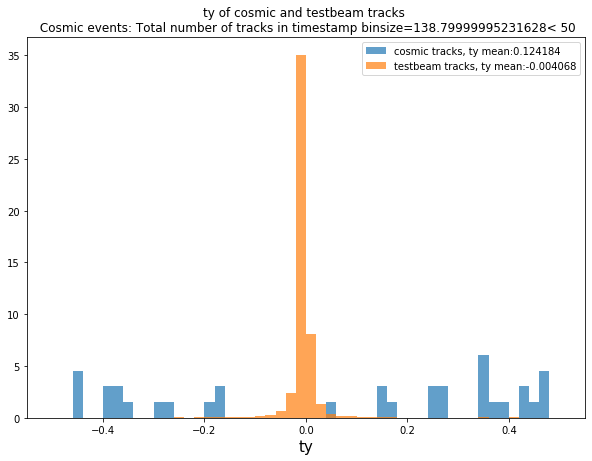

In [204]:
# Plot cosmic event ty distribution

# ty
plt.figure(figsize=(10, 7))

plt.hist(cosmic_evt['ty'], bins=np.linspace(-0.5, 0.5, 51), alpha=0.7, density=True, label='cosmic tracks, ty mean:{:4f}'.format(meanty_cosmic))
plt.hist(testbeam_evt['ty'], bins=np.linspace(-0.5, 0.5, 51), alpha=0.7, density=True, label='testbeam tracks, ty mean:{:4f}'.format(meanty_testbeam))  

plt.xlabel('ty', fontsize=15)
plt.title('ty of cosmic and testbeam tracks \n Cosmic events: Total number of tracks in timestamp binsize={}< 50'.format(timestamp_binsize), fontsize=12)
plt.legend()
plt.show()


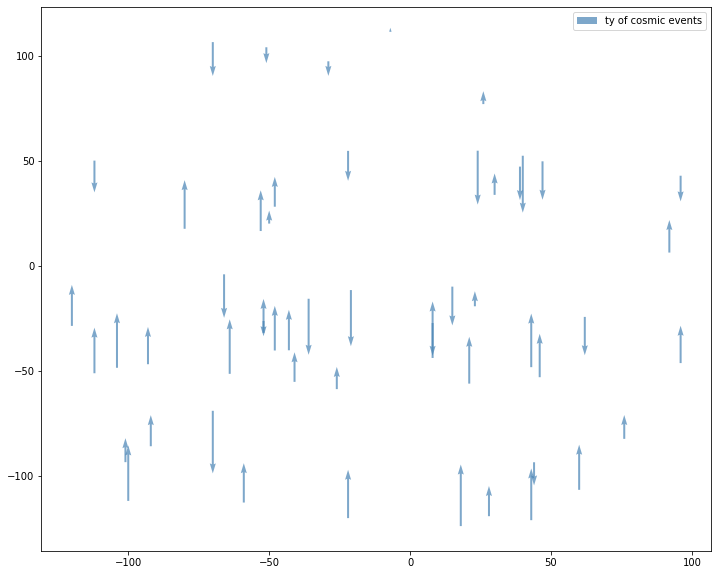

In [209]:
# Plot cosmic event vectorplot
plt.figure(figsize=(12,10))
plt.quiver(cosmic_evt['x1'], cosmic_evt['y1'], np.zeros(len(cosmic_evt['ty'])), cosmic_evt['ty'], color='steelblue', alpha=0.7, width=0.003,label='ty of cosmic events')
plt.legend()
plt.show()

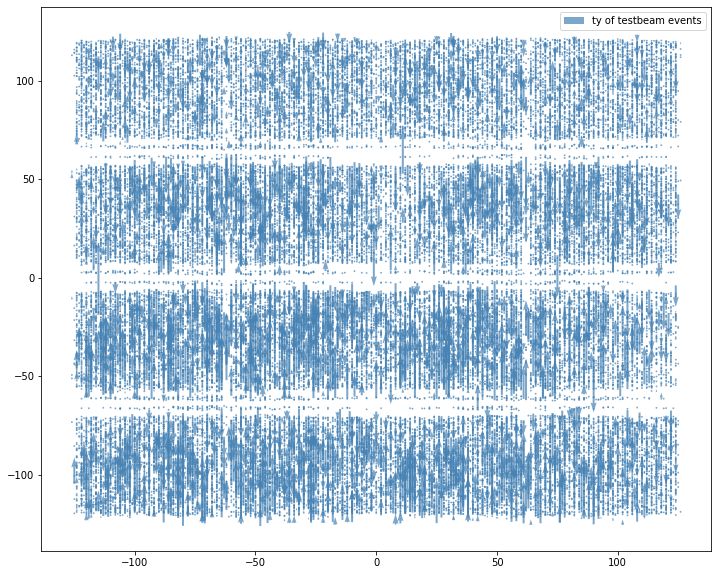

In [211]:
# Plot testbeam event vector plot
plt.figure(figsize=(12,10))
plt.quiver(testbeam_evt['x1'], testbeam_evt['y1'], np.zeros(len(testbeam_evt['ty'])), testbeam_evt['ty'], color='steelblue', alpha=0.7, width=0.003,label='ty of testbeam events')
plt.legend()
plt.show()

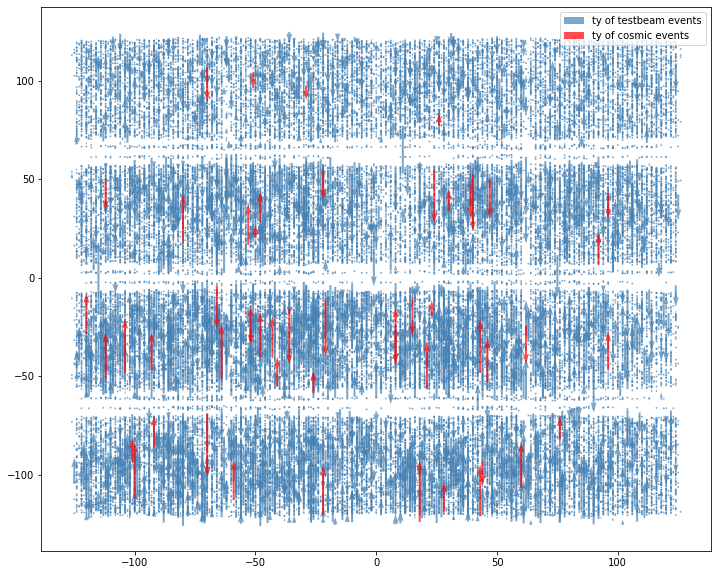

In [213]:
plt.figure(figsize=(12,10))
plt.quiver(testbeam_evt['x1'], testbeam_evt['y1'], np.zeros(len(testbeam_evt['ty'])), testbeam_evt['ty'], color='steelblue', alpha=0.7, width=0.003,label='ty of testbeam events')
plt.quiver(cosmic_evt['x1'], cosmic_evt['y1'], np.zeros(len(cosmic_evt['ty'])), cosmic_evt['ty'], color='red', alpha=0.7, width=0.003,label='ty of cosmic events')

plt.legend(loc="upper right")
plt.show()


In [215]:
testbeam_evt_typos=testbeam_evt[testbeam_evt['ty']>=0]
testbeam_evt_tyneg=testbeam_evt[testbeam_evt['ty']<0]
cosmic_evt
cosmic_evt_typos=cosmic_evt[cosmic_evt['ty']>=0]
cosmic_evt_tyneg=cosmic_evt[cosmic_evt['ty']<0]

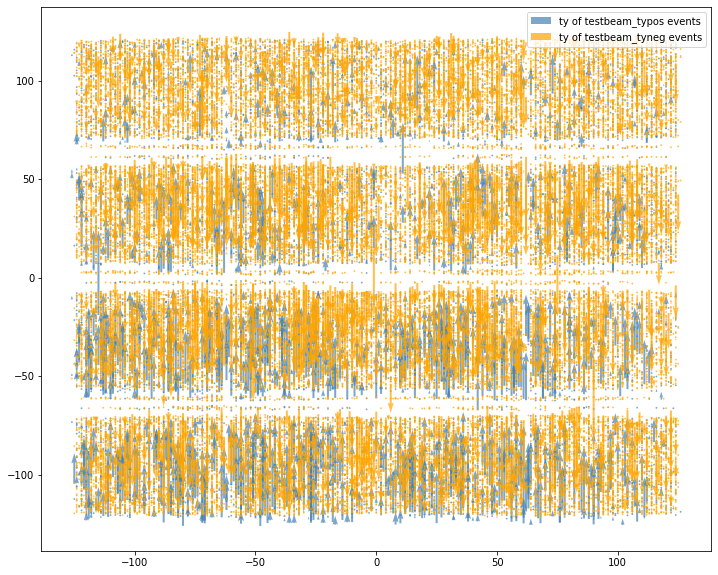

In [218]:
plt.figure(figsize=(12,10))
plt.quiver(testbeam_evt_typos['x1'], testbeam_evt_typos['y1'], np.zeros(len(testbeam_evt_typos['ty'])), testbeam_evt_typos['ty'], color='steelblue', alpha=0.7, width=0.003,label='ty of testbeam_typos events')
plt.quiver(testbeam_evt_tyneg['x1'], testbeam_evt_tyneg['y1'], np.zeros(len(testbeam_evt_tyneg['ty'])), testbeam_evt_tyneg['ty'], color='orange', alpha=0.7, width=0.003,label='ty of testbeam_tyneg events')

#plt.quiver(cosmic_evt_typos['x1'], cosmic_evt_typos['y1'], np.zeros(len(cosmic_evt_typos['ty'])), cosmic_evt_typos['ty'], color='red', alpha=0.7, width=0.003,label='ty of cosmic_typos events')
#plt.quiver(cosmic_evt_tyneg['x1'], cosmic_evt_tyneg['y1'], np.zeros(len(cosmic_evt_tyneg['ty'])), cosmic_evt_tyneg['ty'], color='black', alpha=0.7, width=0.003,label='ty of cosmic_tyneg events')

plt.legend(loc="upper right")
plt.show()

In [219]:
testbeam_largety=testbeam_evt[abs(testbeam_evt['ty'])>0.4]
testbeam_largety_typos=testbeam_largety[testbeam_largety['ty']>=0]
testbeam_largety_tyneg=testbeam_largety[testbeam_largety['ty']<0]

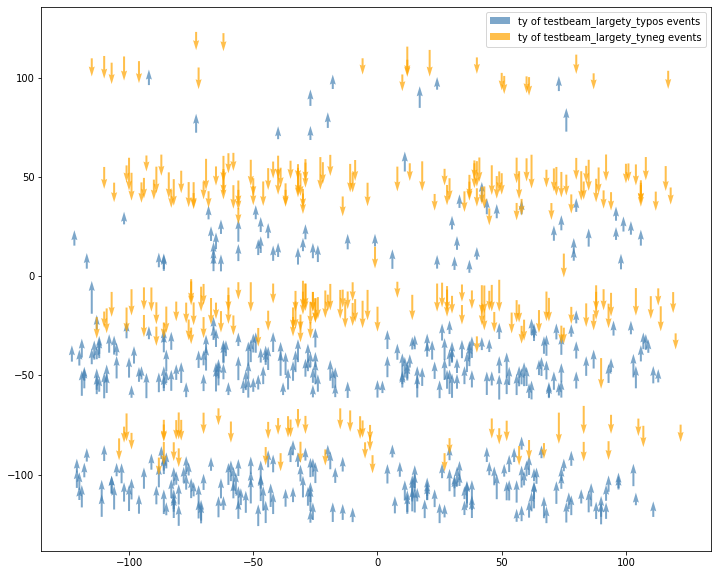

In [220]:
plt.figure(figsize=(12,10))
plt.quiver(testbeam_largety_typos['x1'], testbeam_largety_typos['y1'], np.zeros(len(testbeam_largety_typos['ty'])), testbeam_largety_typos['ty'], color='steelblue', alpha=0.7, width=0.003,label='ty of testbeam_largety_typos events')
plt.quiver(testbeam_largety_tyneg['x1'], testbeam_largety_tyneg['y1'], np.zeros(len(testbeam_largety_tyneg['ty'])), testbeam_largety_tyneg['ty'], color='orange', alpha=0.7, width=0.003,label='ty of testbeam_largety_tyneg events')

plt.legend(loc="upper right")
plt.show()